Suppose a continuous variables $X$ and discrete variable $Y$. For a specific number of $k$ quantization on $X$, we will have a set of $j$ RP trees $\{T_1, T_2, \dots, T_j\}$. For example, in one tree $T_m$, suppose it has $k$ number of leaves(bins) $\{L_1, \dots, L_k\}$. In each leaf $L_i$, if assume $Y$ is binary variable, we have $n_0^{(i)}, n_1^{(i)}$, where $n_0, n_1$ is the number of points which has target variables $\{0, 1\}$. Thus, for this leaf, we have negative loglikelihood $l^{(i)}$ can be defined as:
$$
l_i = -n_1^{(i)} \log\frac{n_1^{(i)}}{n^{(i)}} - n_0^{(i)} \log\frac{n_0^{(i)}}{n^{(i)}} \enspace.
$$,
where $n^{(i)} = n_0^{(i)} + n_1^{(i)}$

The __AIC__ of $T_m$ can be computed by adding number of bins $k$:
$$AIC(T_m) = \sum_1^{k} l_i + k$$


## AIC

In [1]:
# 2 relevant variables + 2 irrelevant variables
from RPTree import *
from estimators import *
from os import listdir
from os.path import isfile, join
import pandas as pd
mypath = 'data/sampledNonLinData/2/2/2-2-0.45832/50RandomDatasetsFromNetworkWithNumSamples_0000000040/'
def read_file(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    sublist = []
    for each in onlyfiles:
        sub = pd.read_csv(mypath + each)
        sub.columns=['X1', 'X2', 'X3', 'X4', 'Y'] 
        sublist.append(sub)

    df = pd.concat(sublist)
    df = df[['X1', 'X2', 'X3', 'X4', 'Y']]
    for _ in range(5, 200):
        name = 'X' + str(_)
        pre = 'X' + str(_-1)
        stop = False
        while not stop:
            num = np.random.randint(-1,2)
            if num:
                break  
        df[name] = df[pre] + np.random.random(df.shape[0]) * num
    return df

# df=read_file(mypath)
# df

In [2]:
df=read_file(mypath)
df

,X1,X2,X3,X4,Y,X5,X6,X7,X8,X9,...,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199
0,-0.234980,0.747260,-0.150010,0.000973,1,-0.345987,-0.042968,-0.233030,0.748088,0.142052,...,2.980672,2.718163,3.560144,3.200929,4.082224,4.873852,5.510070,5.562225,4.580527,4.210946
1,-0.342830,0.060417,-0.529620,0.560480,1,-0.134094,-0.133363,-0.938358,-0.864771,-0.975896,...,0.447529,-0.345359,0.554472,-0.377552,0.425492,0.533549,1.466632,2.072898,1.803300,1.637858
2,-0.146550,-0.446180,-0.612860,0.102730,1,-0.514029,-0.016231,-0.306403,0.128669,-0.009919,...,3.748541,2.845091,3.484581,3.428800,3.429470,4.256162,5.166093,5.471069,5.088370,4.184019
3,-0.436290,-0.374580,0.036372,0.365040,1,0.195969,0.708357,-0.212351,0.398646,-0.429304,...,6.019575,5.634867,5.873777,5.808887,6.260542,6.771183,7.660004,7.678267,7.133873,6.418672
4,-0.656060,0.920020,0.061925,-0.286550,1,-1.184221,-0.379210,-0.661442,-0.580275,-1.309894,...,-3.088065,-3.551971,-2.890820,-3.101140,-2.833602,-2.697161,-2.165192,-1.567591,-1.699912,-2.155001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.000044,-0.103630,0.777620,-0.468660,1,-0.955859,-0.254817,-0.806985,-0.069770,-0.917385,...,2.143704,1.868795,1.898111,1.082789,1.902290,2.826910,2.893920,3.154894,2.216611,1.669087
35,0.750270,-0.664030,-0.386600,-0.645540,1,-1.179090,-1.119415,-1.843928,-1.476466,-2.173317,...,-2.337426,-2.851809,-2.507219,-3.028738,-2.625852,-2.361046,-1.958384,-1.154337,-1.945292,-2.794031
36,0.233680,-0.643700,-0.275740,-0.980980,1,-1.652227,-0.950988,-1.478496,-0.515288,-0.730896,...,-8.980669,-9.650947,-9.629800,-9.634480,-9.097863,-8.869352,-8.568487,-7.759663,-8.243515,-8.738934
37,-0.848080,0.681250,-0.542150,0.376080,1,-0.106044,0.561503,-0.036440,0.130471,0.056831,...,-2.714321,-2.945412,-2.571738,-2.798569,-2.476940,-1.977495,-1.473309,-0.542776,-0.677620,-0.946471


In [3]:
from RPTree import *
from estimators import *
from copy import deepcopy

def run(X, y, MinSize, y_dic, estimator='naive_estimate', set_bins=None, types='median'):
    """n represents how many dimensions, can't do repeatation
    """
    tree = RPTree(X)
    tree_made = tree.MakeTree(MinSize, types=types)
    if set_bins and tree_made.counts() != set_bins:
        return [None] * 4
    all_entropy, bins, depth = get_entropy(tree_made, y_dic, MinSize, estimator=estimator)
    res, L = all_entropy[X]['entropy'], all_entropy[X]['loglikelihood'] # main entropy
    est = eval(estimator)
    y_entropy = est(y)
    aic = L + bins
    return 1-res/y_entropy, L, bins, depth, aic, MinSize, all_entropy

## Add randomness

In [4]:
mypath = listdir('data/sampledNonLinData/2/2/2-2-0.45832/')
all_files = [read_file('data/sampledNonLinData/2/2/2-2-0.45832/' + each + '/') for each in mypath]
all_files = [(each.shape, each) for each in all_files]
all_files.sort()
all_files = [each[1] for each in all_files]

In [5]:
result_dic = {}

final_aic, final_fmi, final_bin = 0, 0, 0
sizes = [i for i in range(2, 101)]
for df in all_files:
    all_result = {}
    aic_result = {}
    entro_result = {}
    entro_dic_result = {}
    x_lst = tuple([tuple(each) for each in df.iloc[:,:-1].values.tolist()])
    y_dic = dict(zip(x_lst, df.Y.values.tolist()))
    X, Y = x_lst, df.Y.values
    print('Start: ' , df.shape[0])
    if df.shape[0] > 10000:
        print('Stop')
        break
    for rep in range(5):
        for size in sizes:
            fmi, L, bins, depth, aic, MinSize, entropy_dic = run(X, Y, size, y_dic, estimator='naive_estimate')
            if bins not in all_result:
                all_result[bins] = [fmi]
                aic_result[bins] = [aic]
                entro_result[bins] = [L]
                entro_dic_result[bins] = [entropy_dic]
            else:
                all_result[bins].append(fmi)
                aic_result[bins].append(aic)
                entro_result[bins].append(L)
                entro_dic_result[bins].append(entropy_dic)

            if not final_aic or final_aic > aic:
                final_aic = aic
                final_fmi = fmi
                final_bin = bins
    result_dic[df.shape[0]] = [all_result, aic_result, entro_result, entro_dic_result]
    print("Finished")  

Start:  950
Finished
Start:  1950


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/yluu0028/Documents/Yiwen PhD/Confirmation/Year_2/RPTree.py", line 191, in ChooseRule_median
    rule = np.median([sum((each - np.mean(data, axis=0))**2) for each in data])
  File "/Users/yluu0028/Documents/Yiwen PhD/Confirmation/Year_2/RPTree.py", line 191, in <listcomp>
    rule = np.median([sum((each - np.mean(data, axis=0))**2) for each in data])
  File "<__array_function__ internals>", line 5, in mean
  File "/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 3372, in mean
    return _methods._mean(a, axis=axis, dtype=dtype,
  File "/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py", line 144, in _mean
    arr = asanyarray(a)
  File "/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py", line 136, in asanyarray
    return array(a, dtype, copy=False, order=order, subok=True)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most rec

TypeError: object of type 'NoneType' has no len()

In [6]:
final_aic, final_fmi

(400.23881493840213, 0.029704829742898786)

In [7]:
# import pickle

# with open('RP_tree_1_add_Irrelevant_Variables.p', 'wb') as fp:
#     pickle.dump(result_dic, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
# import pickle

# with open('RP_tree_1_add_Irrelevant_Variables.p', 'rb') as fp:
#     result_dic = pickle.load(fp)

In [8]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def bias_std(dic):
    """
    dic = result_dic[key]
    """
    bias_lst = [np.mean(dic[key])-0.45832 for key in dic]
    std_lst = [np.std(dic[key]) for key in dic]
    summ = pd.DataFrame({'Mean': bias_lst, 'std': std_lst})
    summ.index = list(dic.keys())
    return summ

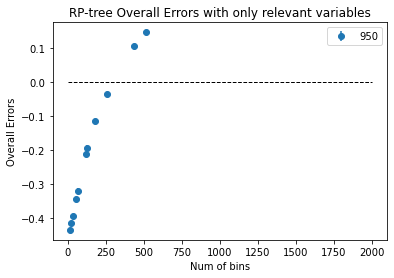

In [11]:
fig, ax11 = plt.subplots(sharex=True, sharey=False)
ax11.set_xlabel('Num of bins')
ax11.set_title('RP-tree Overall Errors with only relevant variables')
ax11.set_ylabel('Overall Errors')
for key in result_dic:
    summ = bias_std(result_dic[key][0])
    summ = summ.sort_index()
    ind = summ.index
    y = summ[f'Mean']
    yerr = summ[f'std'].values
    ax11.errorbar(ind, y, yerr=yerr, fmt='o', label=str(key))

#     ax11.hist( x=james_dic1[50], bins=20, width=0.010, label='James-Stein')
#     ax11.hist( x=reliable_dic1[50], bins=20, width=0.015, label='Reliable')
#     ax11.hist( x=naive_dic1[50], bins=20, width=0.015, label='Naive')
ax11.hlines(0, xmin=0, xmax=2000, color='k', linestyle='dashed', linewidth=1)
ax11.legend()
plt.show()

In [20]:
[np.mean(result_dic[950][1][each]) for each in result_dic[950][1]]

[668.6517489927338,
 610.1664208701122,
 484.57342493413444,
 442.2982702255479,
 419.6694763263745,
 416.69919789456236,
 405.2320058345355,
 405.60638088499286,
 402.78580900117106,
 400.57038936073263,
 402.8033625105336]

In [21]:
[np.mean(result_dic[950][0][each]) for each in result_dic[950][0]]

[0.6044167597062144,
 0.5652384919063898,
 0.42279727700526787,
 0.34268443320434416,
 0.2634646131826425,
 0.24571288009196468,
 0.1383073382331995,
 0.11210955285977695,
 0.06367689653794155,
 0.044018963940549605,
 0.023228731997457314]

In [24]:
import pickle

with open('Base_Line_1_KD_Tree_add_Irrelevant_Variables.p', 'rb') as fp:
    data = pickle.load(fp)

In [27]:
new_dic = {}
new_dic['KD-Tree'] = data[950]

new_dic['RP-Tree'] = result_dic[950]

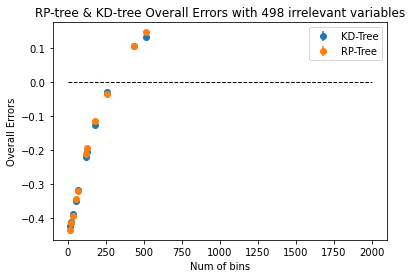

In [30]:
fig, ax11 = plt.subplots(sharex=True, sharey=False)
ax11.set_xlabel('Num of bins')
ax11.set_title('RP-tree & KD-tree Overall Errors with 498 irrelevant variables')
ax11.set_ylabel('Overall Errors')
for key in new_dic:
    summ = bias_std(new_dic[key][0])
    summ = summ.sort_index()
    ind = summ.index
    y = summ[f'Mean']
    yerr = summ[f'std'].values
    ax11.errorbar(ind, y, yerr=yerr, fmt='o', label=str(key))

#     ax11.hist( x=james_dic1[50], bins=20, width=0.010, label='James-Stein')
#     ax11.hist( x=reliable_dic1[50], bins=20, width=0.015, label='Reliable')
#     ax11.hist( x=naive_dic1[50], bins=20, width=0.015, label='Naive')
ax11.hlines(0, xmin=0, xmax=2000, color='k', linestyle='dashed', linewidth=1)
ax11.legend()
plt.show()

__Averaging the models__
Suppose we have an estimator $\theta^{(k)}$ to control the number of bins $k$. By applying this estimator in RP-trees on dataset, we have a set of RP-trees $(T_m = \{T_0, \dots, T_i\})$. For a RP-tree $T_i$, we have a y distribution $p(y|T^{(i)})$. If we consider the overall y distirbution on the whole data from these RP-trees, it can be a mixture model of different weighted RP-trees. 
$$
P(y) = \sum_i^k w_i p(y|T_i) \enspace.
$$,
where $w_i \propto e^{-AIC(T_i)}, \sum w_i = 1$.
Thus, we have
\begin{align}
I(X;Y) &= H(Y) - H(Y|X)\\
&= -\sum_i^k w_i p(y|T_i) \log p(y|T_i) + \sum_i^k w_i p((y|x)|T_i) \log p((y|x)|T_i)
\end{align}

In [19]:
def find_y(dic):
    new_y_lst = []
    for each in dic:
        new_y = []
        for key in each.keys(): 
            if "main" in each[key]:
                a, b = each[key]['main']
                a, b = list(a), list(b)
                if len(a) == 1:
                    new_y += a*b[0]
                else:
                    new = [a[0]] * b[0] + [a[1]] * b[1]
                    new_y += [np.mean(new)] * (b[0] + b[1])
                        
        entro = entropy(np.array(new_y))
        new_y_lst.append(entro)
    return np.array(new_y_lst)


def ave_model(result_dic, n):
    weights = [math.exp(-each) for code in result_dic[n][1].keys() for each in result_dic[n][1][code]]
    para = 1/sum(weights)
    weights = np.array([para * each for each in weights])

    entro = [each/n for code in result_dic[n][2].keys() for each in result_dic[n][2][code]]
    norm_entro = sum(np.array(entro) * weights)

    entro_y = []
    for key in result_dic[n][3].keys():
        for code in find_y(result_dic[n][3][key]):
            entro_y.append(code)
            
    entro_y = sum((np.array(entro_y) * weights))
    return 1 - norm_entro/entro_y

for key in result_dic.keys():
    print("n:", key, "FMI: ", ave_model(result_dic, key))

n: 950 FMI:  0.8842866333644104
